In [1]:
import numpy as np
import os
import pandas as pd
import pyarrow.parquet as parquet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
testDataPath = '/home/adeykin/projects/SNAHackaton/imagesTest'
trainDataPath = '/home/adeykin/projects/SNAHackaton/imagesTrain'

In [4]:
# Read the test data
#test = parquet.read_table(testDataPath, columns = ['instanceId_userId', 'instanceId_objectId','ImageId']).to_pandas()
#est = parquet.read_table(testDataPath).to_pandas()
#test = parquet.read_metadata(testDataPath).to_pandas()
pqFile = parquet.ParquetFile(testDataPath + '/_metadata')
pqFile.schema

#est.head(10)
#test

instanceId_userId: INT32
instanceId_objectType: BYTE_ARRAY UTF8
instanceId_objectId: INT32
audit_clientType: BYTE_ARRAY UTF8
audit_timestamp: INT64
metadata_ownerId: INT32
metadata_createdAt: INT64
ImageId.list.element: BYTE_ARRAY UTF8
date: BYTE_ARRAY UTF8
 

In [5]:
pqFile = parquet.ParquetFile(trainDataPath + '/_metadata')
pqFile.schema

instanceId_userId: INT32
instanceId_objectType: BYTE_ARRAY UTF8
instanceId_objectId: INT32
feedback.list.element: BYTE_ARRAY UTF8
audit_clientType: BYTE_ARRAY UTF8
audit_timestamp: INT64
metadata_ownerId: INT32
metadata_createdAt: INT64
ImageId.list.element: BYTE_ARRAY UTF8
 

In [18]:
#train = parquet.read_table(trainDataPath, columns = ['instanceId_userId', 'instanceId_objectId','ImageId','feedback']).to_pandas()
train = parquet.read_table(trainDataPath, columns = ['instanceId_userId', 'instanceId_objectId']).to_pandas()
train.head(10)

,instanceId_userId,instanceId_objectId,date
0,116,28780736,2018-02-01
1,353,26245790,2018-02-01
2,707,12497594,2018-02-01
3,1724,16745663,2018-02-01
4,1730,13138095,2018-02-01
5,1865,13025088,2018-02-01
6,1895,28048075,2018-02-01
7,2297,12227959,2018-02-01
8,3767,23423684,2018-02-01
9,3812,25282465,2018-02-01


In [6]:
train.shape

(17570921, 5)

In [15]:
u = train['instanceId_userId'].unique()
len(u)

3839348

In [16]:
u = train['instanceId_objectId'].unique()
len(u)

2193286

In [24]:
g = train.groupby('instanceId_objectId')
counts = g['instanceId_objectId'].count()
hist = np.histogram(counts.values, bins=counts.max(), density=False)
hist
#print(g)
#print(counts)

(array([919458, 357525, 195475, ...,      0,      0,      1]),
 array([1.00000000e+00, 1.99971157e+00, 2.99942313e+00, ...,
        3.46500058e+03, 3.46600029e+03, 3.46700000e+03]))

In [43]:
print(hist[0][0:200])
print(hist[0][0:8]/2193286)

[919458 357525 195475 126216  88016  65668  50447  40001  32528  26782
  23060  19519  16805  14692  13135  11573  10233   9499   8262   7691
   6814   6462   5914   5519   5117   4786   4366   4139   4111   3627
   3492   3318   3001   2907   2839   2635   2557   2484   2293   2180
   2090   1982   2028   1848   1790   1673   1631   1621   1485   1442
   1369   1404   1308   1298   1237   1216   1118   1119   1006   1011
    947    979    892    894    827    806    865    807    770    737
    727    659    715    701    603    618    589    604    583    587
    535    527    518    521    527    564    487    482    469    471
    411    421    396    392    363    413    394    356    379    343
    346    338    324    281    332    304    307    286    305    264
    283    255    252    272    257    262    231    229    242    216
    206    239    222    237    196    213    222    216    210    210
    175    193    208    184    193    179    186    166    163    184
    14

In [29]:
g = train.groupby('instanceId_userId')
counts = g['instanceId_userId'].count()
print(counts.max())
hist2 = np.histogram(counts.values, bins=counts.max(), density=False)
print(hist2)

2675
(array([1308055,  795820,  465278, ...,       0,       0,       1]), array([1.00000000e+00, 1.99962617e+00, 2.99925234e+00, ...,
       2.67300075e+03, 2.67400037e+03, 2.67500000e+03]))


In [41]:
print(hist2[0][0:200])
print(hist2[0][0:8]/3193286)

[1308055  795820  465278  294009  199782  142688  105942   81512   63629
   50524   41404   34603   28578   24417   20816   17736   15248   13165
   11613   10203    9155    8180    7320    6529    5923    5143    4641
    4400    3904    3627    3194    3015    2799    2580    2282    2174
    2020    1883    1713    1708    1524    1409    1313    1223    1198
    1066    1028     951     988     859     800     703     720     675
     686     639     599     555     505     508     455     443     454
     416     382     385     376     378     289     322     292     326
     292     258     272     282     239     231     207     213     211
     192     189     176     165     163     151     161     160     145
     149     147     129     119     107     107     112     119     113
     115      97      95      95      93      76      80      84      82
      71      90      69      50      69      72      64      93      50
      70      70      53      59      54      58   

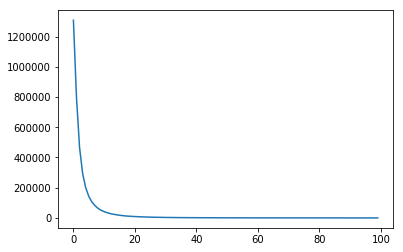

In [27]:
plt.plot(hist2[0][0:100])

Train: <br />
Data size: 17.570.921 <br />
Unique users num: 3.193.286 <br />
Unique posts num: 2.193.286 <br />

By users:<br />
    1 308 055 users have only one interaction (41%) <br />
      795 820                   2 interactions (25%)
          115 users have      100 interactions
           13 users have      200 interactions
    Hist: [1308055  795820  465278  294009  199782  142688  105942   81512]   
    
    
    
By instances: <br />
    919 458 - 1 interactgion (40 %)
    357 525 - 2 interactions (16.3 %)
        343 - 100 interactions
         72 - 200 interactions
    Hist: [919458, 357525, 195475, 126216,  88016,  65668,  50447,  40001, 32528,  26782] <br />
    1000 have 2 interactions<br />
    
 
Test and train intersections:<br />
    236 549 unique users are intersected: its 7% of posts number <br />
        275 unique posts are intersected: its 0.001<br />

# Conpute interactions

In [4]:
train = parquet.read_table(trainDataPath, columns = ['instanceId_userId']).to_pandas()
train.head(10)

,instanceId_userId,date
0,116,2018-02-01
1,353,2018-02-01
2,707,2018-02-01
3,1724,2018-02-01
4,1730,2018-02-01
5,1865,2018-02-01
6,1895,2018-02-01
7,2297,2018-02-01
8,3767,2018-02-01
9,3812,2018-02-01


In [8]:
test = parquet.read_table(testDataPath, columns = ['instanceId_userId']).to_pandas()

In [10]:
intersect = np.intersect1d(train['instanceId_userId'].values, test['instanceId_userId'].values)

In [13]:
print(train.shape)
print(test.shape)
print(intersect.shape)

(17570921, 2)
(1227183, 1)
(236549,)


In [14]:
intersect

array([      59,      107,      158, ..., 15716543, 15716579, 15716681],
      dtype=int32)

In [17]:
train = parquet.read_table(trainDataPath, columns = ['instanceId_objectId']).to_pandas()
test = parquet.read_table(testDataPath, columns = ['instanceId_objectId']).to_pandas()
intersect = np.intersect1d(train['instanceId_objectId'].values, test['instanceId_objectId'].values)
print(train.shape)
print(test.shape)
print(intersect.shape)

(17570921, 2)
(1227183, 1)
(275,)


# Persent of likes

In [4]:
train = parquet.read_table(trainDataPath, columns = ['feedback']).to_pandas()
train.head()

,feedback,date
0,[Ignored],2018-02-01
1,[Ignored],2018-02-01
2,[Ignored],2018-02-01
3,[Ignored],2018-02-01
4,"[ReShared, Ignored]",2018-02-01


Posible values:
 * Ingnored 0
 * ReShared 0
 * Clicked 0
 * Liked +1
 * Disliked -1

In [6]:
train

,feedback,date
0,[Ignored],2018-02-01
1,[Ignored],2018-02-01
2,[Ignored],2018-02-01
3,[Ignored],2018-02-01
4,"[ReShared, Ignored]",2018-02-01
5,[Ignored],2018-02-01
6,[Ignored],2018-02-01
7,[Ignored],2018-02-01
8,[Ignored],2018-02-01
9,[Ignored],2018-02-01
